# parking space line detection


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image dimensions: (600, 600, 3)


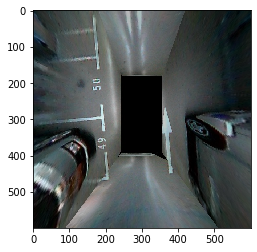

In [2]:
# read image
src = cv2.imread('img/002.bmp')
print('Image dimensions:', src.shape)
plt.imshow(src)

In [32]:
# gray scale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

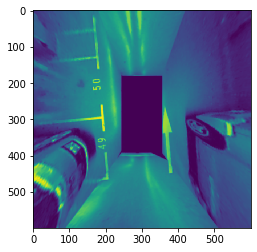

In [37]:
# low pass filter
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blur)

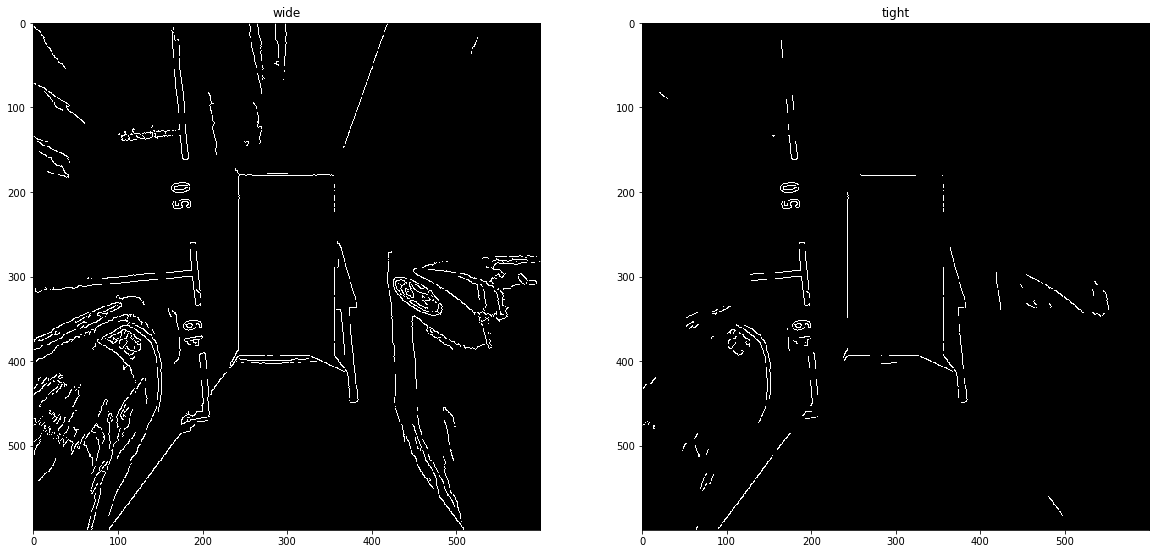

In [40]:
# find eges
wide = cv2.Canny(blur, 30, 100)
tight = cv2.Canny(blur, 200, 240)
 
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

In [41]:
edges = cv2.Canny(blur, 30, 100)

number of lines 34


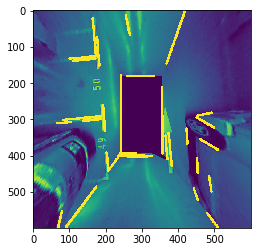

In [59]:
# Define the Hough transform parameters
rho = 1
theta = np.pi/180
threshold = 40
min_line_length = 35
max_line_gap = 5

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the image copy
line_image = np.copy(gray) #creating an image copy to draw lines on
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)
print('number of lines:',lines.shape[0])